<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/titani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

traindf = pd.read_csv("/content/drive/MyDrive/dataset/titaiic/train.csv", encoding="utf-8")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
testdf = pd.read_csv("/content/drive/MyDrive/dataset/titaiic/test.csv", encoding="utf-8")
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# 資料預處理 觀察資料缺失狀況
# isna() is nall, sum() True = 1, False = 0 
traindf.isna().sum()
# 補缺失值 數值,類別

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
med = traindf.median()
# fill nall > median
traindf = traindf.fillna(med)
traindf.isna().sum()

<ipython-input-4-079e344b602a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = traindf.median()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 用train data 訓練
testdf = testdf.fillna(med)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# idxmax index max value
most = traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"] = traindf["Embarked"].fillna(most)
testdf["Embarked"] = testdf["Embarked"].fillna(most)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# 函式庫只吃數字 One-Hot-Encoding
def one_hot_encoding(df, column):
    dummy = pd.get_dummies(column)
    df = pd.concat([df, dummy], axis=1)
    return df
traindf = one_hot_encoding(traindf, traindf["Embarked"])
testdf = one_hot_encoding(testdf, testdf["Embarked"])
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [ ]:
def extract_title(s):
    name_tuple = ["Miss", "Mr", "Mrs"]
    title = s.split(",")[-1].split(".")[0].replace(" ", "")
    if title in name_tuple:
        return title
    else:
        return "Throw" 
# 創造p_title_data
p_title = traindf["Name"].apply(extract_title)
# 觀察跟Survived的關係
pd.crosstab(p_title, traindf["Survived"]).T
traindf = one_hot_encoding(traindf, p_title)
p_title_test = testdf["Name"].apply(extract_title)
testdf = one_hot_encoding(testdf, p_title_test)
traindf
pd.crosstab(p_title, traindf["Survived"]).T

Name,Miss,Mr,Mrs,Throw
Survived,,,,
0,55,436,26,32
1,127,81,99,35


In [ ]:
traindf = one_hot_encoding(traindf, traindf["Sex"])
testdf = one_hot_encoding(testdf, testdf["Sex"])
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,Miss,Mr,Mrs,Throw,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,0,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,0,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,0,1,0,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,0,1,1,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,S,0,0,1,1,0,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,1,0,0,0,1,0,0,0,1


In [ ]:
# 看一下columns
traindf.columns
traindf = traindf.drop(['PassengerId', 'Name', 'Sex', 
       'Ticket', 'Cabin', 'Embarked', 'Throw'], axis=1)
testdf = testdf.drop(['Name', 'Sex', 'Ticket', 'Cabin',
            'Embarked', 'Throw'], axis=1)

<AxesSubplot:>

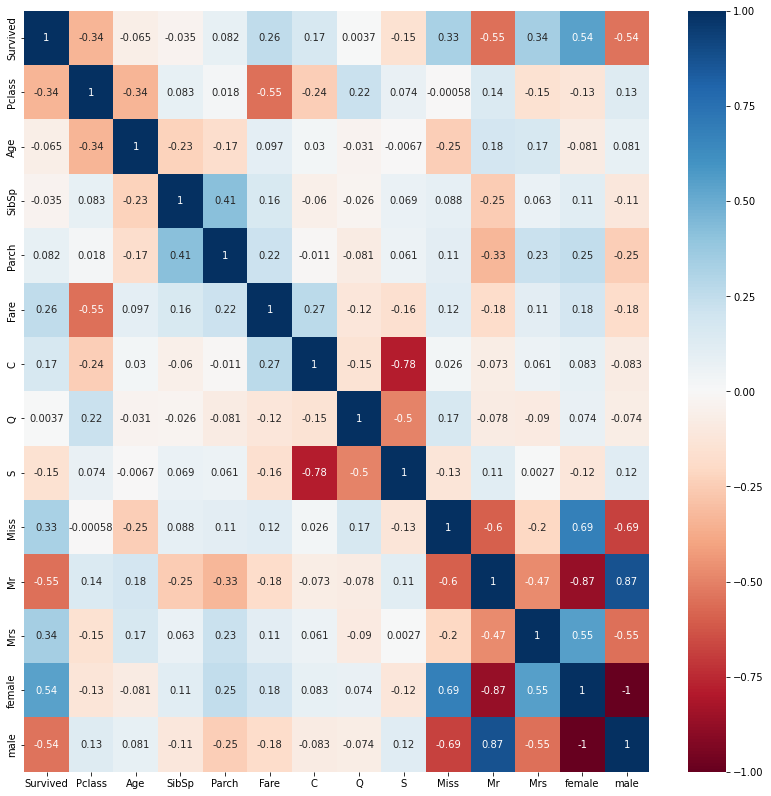

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(14, 14))
sns.heatmap(traindf.corr(), annot=True, cmap="RdBu")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
trainx = traindf.drop(["Survived"], axis=1)
trainy = traindf["Survived"]
# n_estimators how many trees
clf = RandomForestClassifier(max_depth=10, n_estimators=26)
# cv :split n part ,look score
np.average(cross_val_score(clf, trainx, trainy, cv=10))

0.8227340823970037

In [ ]:
from sklearn.model_selection import GridSearchCV

p_dict = {
    "max_depth": range(4, 13),
    "n_estimators": range(20, 50)
    }
clf = RandomForestClassifier()
# p_dict 帶入參數 cv 交叉驗證份數
grid_s = GridSearchCV(clf, p_dict ,cv=10)
grid_s.fit(trainx, trainy)
print(grid_s.best_params_)
print(grid_s.best_score_)

{'max_depth': 9, 'n_estimators': 23}
0.8451810237203496


In [ ]:
testx = testdf.drop(["PassengerId"], axis=1)
testid = testdf["PassengerId"]
clf = RandomForestClassifier(max_depth=7, n_estimators=28)
clf.fit(trainx, trainy)
pre = clf.predict(testx)
result = pd.DataFrame()
result["passengerId"] = testid
result["Survived"] = pre
result.to_csv("/content/drive/MyDrive/result.csv", encoding="utf-8", index=False)
result

,passengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
print(trainx.columns)
clf.feature_importances_


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Miss', 'Mr',
       'Mrs', 'female', 'male'],
      dtype='object')


array([0.09535938, 0.10227957, 0.06076492, 0.03445311, 0.16156104,
       0.01247015, 0.00968168, 0.01314142, 0.04337206, 0.21155724,
       0.05247768, 0.06192404, 0.14095771])

In [ ]:
if -1:
    print("A")

A
